В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv(r'C:\Users\olha.koltun\OneDrive - Trico\ML Course\data\cars.csv')

cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
# Display general information
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
# Count the number of unique values in each column
unique_values = cars_df.nunique()
unique_values

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

In [5]:
# Separate columns into numerical and categorical
numerical_columns = cars_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = cars_df.select_dtypes(include=['object']).columns

print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")

Number of numerical columns: 8
Number of categorical columns: 5


In [6]:
# Describe numerical columns
cars_df[numerical_columns].describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [7]:
# Analyze categorical columns
categorical_analysis = []
for col in categorical_columns:
    unique_vals = cars_df[col].unique()
    if len(unique_vals) == 2:
        category_type = "binary"
    else:
        category_type = "multicategorical"
    categorical_analysis.append({
        "Column": col,
        "Unique values": unique_vals,
        "Type": category_type
    })

# Sort the results by category_type
sorted_analysis = sorted(categorical_analysis, key=lambda x: x["Type"])

# Detailed analysis of each categorical column
for analysis in sorted_analysis:
    print(f"Column '{analysis['Column']}' - Type: {analysis['Type']}")
    print(f"{len(analysis['Unique values'])} unique values: {analysis['Unique values']}")
    print("*" * 50)

Column 'Fuel_Type' - Type: binary
2 unique values: ['Petrol' 'Diesel']
**************************************************
Column 'Transmission' - Type: binary
2 unique values: ['Manual' 'Automatic']
**************************************************
Column 'Brand' - Type: multicategorical
11 unique values: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
**************************************************
Column 'Model' - Type: multicategorical
58 unique values: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSpo

**Висновок:** У наборі даних **8 числових колонок** (одна з яких є колонка-ідентифікатор `Car_ID`, яка не несе змістовної інформації для аналізу) та **5 категоріальних колонок**, з них:
- 2 бінарні `Fuel_Type` та `Transmision` (мають лише 2 значення);
- 2 мультикатегоріальні (більше 2 значень), де значення пов’язані, оскільки кожен `Brand` може мати лише певні `Model`;
- 1 мультикатегоріальна колонка, в якій можна встановити відношення порядку (`Owner_Type` з First < Second < Third).

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [8]:
X = cars_df.drop(columns=['Price'], axis=1)
y = cars_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 12)
X_test shape: (20, 12)
y_train shape: (80,)
y_test shape: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [9]:
# Encode binary columns dynamically and save as new columns
binary_columns = ['Fuel_Type', 'Transmission']

for col in binary_columns:
    # Calculate the occurrences of each category and sssign 1 to the category with more occurrences
    value_counts = X[col].value_counts()
    mapping = {value_counts.index[0]: 1, value_counts.index[1]: 0}
    
    # Apply the mapping and create a new column
    X_train[f"{col}_Code"] = X_train[col].map(mapping)
    X_test[f"{col}_Code"] = X_test[col].map(mapping)
    
    print(f"Mapping for column '{col}': {mapping}")

Mapping for column 'Fuel_Type': {'Petrol': 1, 'Diesel': 0}
Mapping for column 'Transmission': {'Automatic': 1, 'Manual': 0}


In [10]:
brand_enc = OneHotEncoder(sparse_output=False) 
brand_enc.fit(X_train[['Brand']])

# Transform both training and test data
brand_train_encoded = brand_enc.transform(X_train[['Brand']])
brand_test_encoded = brand_enc.transform(X_test[['Brand']])

# Add the encoded columns to X_train and X_test
brand_encoded_columns = brand_enc.categories_[0]  

X_train[brand_encoded_columns] = brand_train_encoded
X_test[brand_encoded_columns] = brand_test_encoded

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Один із можливих підходів до групування моделей — це додавання нового стовпця `Body_Type`, що відображає тип кузова. Мапінг (`model_to_body_type`) дозволяє присвоїти кожній моделі категорію кузова (`SUV & Truck`, `Sedan`, `Hatchback`, або `Other`).

In [12]:
model_groups = {
    'SUV & Truck': ['Nexon', 'Scorpio', 'Endeavour', 'Creta', 'Harrier', 'Fortuner', 'Safari', 'WR-V',
                    'S-Cross', 'T-Roc', 'XUV300', 'EcoSport', 'Vitara', 'BR-V', 'Innova', 'Innova Crysta',
                    'Tiguan', 'Venue', 'Thar', 'Ranger', 'X1', 'GLC', 'GLE', 'Q7', 'X5', 'GLA', 'X3', 'Q3'],
    'Sedan': ['Corolla', 'Civic', 'Sonata', 'Verna', 'Elantra', 'City', 'Aspire', 'Passat',
              'Camry', 'Vento', 'Ameo', 'Yaris', 'Tigor', 'A3', 'A4', 'A6', 'C-Class', 'E-Class', 
              '5 Series', '7 Series', '3 Series'],
    'Hatchback': ['Swift', 'Polo', 'Altroz', 'Figo', 'Tiago', 'Santro'],
    'Other': ['Mustang', 'A5', 'Ertiga']
}

# Create a flat mapping from model to body type
model_to_body_type = {model: body_type for body_type, models in model_groups.items() for model in models}

# Map the models to body types
X_train['Body_Type'] = X_train['Model'].map(model_to_body_type)
X_test['Body_Type'] = X_test['Model'].map(model_to_body_type)

In [13]:
body_type_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
body_type_enc.fit(X_train[['Body_Type']])

# Transform both training and test data
body_type_train_encoded = body_type_enc.transform(X_train[['Body_Type']])
body_type_test_encoded = body_type_enc.transform(X_test[['Body_Type']])

# Add the encoded columns to X_train and X_test
body_type_encoded_columns = body_type_enc.categories_[0]  

X_train[body_type_encoded_columns] = body_type_train_encoded
X_test[body_type_encoded_columns] = body_type_test_encoded

Очікуваний результат після трансформацій:

In [14]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Body_Type,Hatchback,Other,SUV & Truck,Sedan
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SUV & Truck,0.0,0.0,1.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,1.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sedan,0.0,0.0,0.0,1.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Sedan,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,SUV & Truck,0.0,0.0,1.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Body_Type,Hatchback,Other,SUV & Truck,Sedan
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SUV & Truck,0.0,0.0,1.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Hatchback,1.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Sedan,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,1.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Sedan,0.0,0.0,0.0,1.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [15]:
# Select numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=['number']).drop('Car_ID', axis=1)

# Combine numeric columns with the target variable
data_for_correlation = pd.concat([X_train_numeric, y_train], axis=1)

data_for_correlation.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Hatchback,Other,SUV & Truck,Sedan,Price
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1600000
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2600000
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3200000
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,650000
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2500000


In [16]:
# Compute the correlation matrix
correlation_matrix = data_for_correlation.corr()

display(correlation_matrix)


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Hatchback,Other,SUV & Truck,Sedan,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,0.412966,-0.037437,-0.076335,-0.142798,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.253460,-0.122840,0.080895,0.125252,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,0.383419,-0.231832,-0.230158,0.128353,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,-0.339919,0.303158,0.170139,-0.127598,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,-0.327726,0.460796,0.001897,-0.040812,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.094002,-0.287391,0.428725,-0.241452,0.000979
Fuel_Type_Code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,0.213512,0.045199,-0.198747,0.057107,-0.110782
Transmission_Code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,-0.389318,0.205370,-0.188475,0.316656,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,-0.103221,0.258199,-0.142067,0.076974,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,-0.110250,-0.091928,-0.012893,0.122816,0.477522


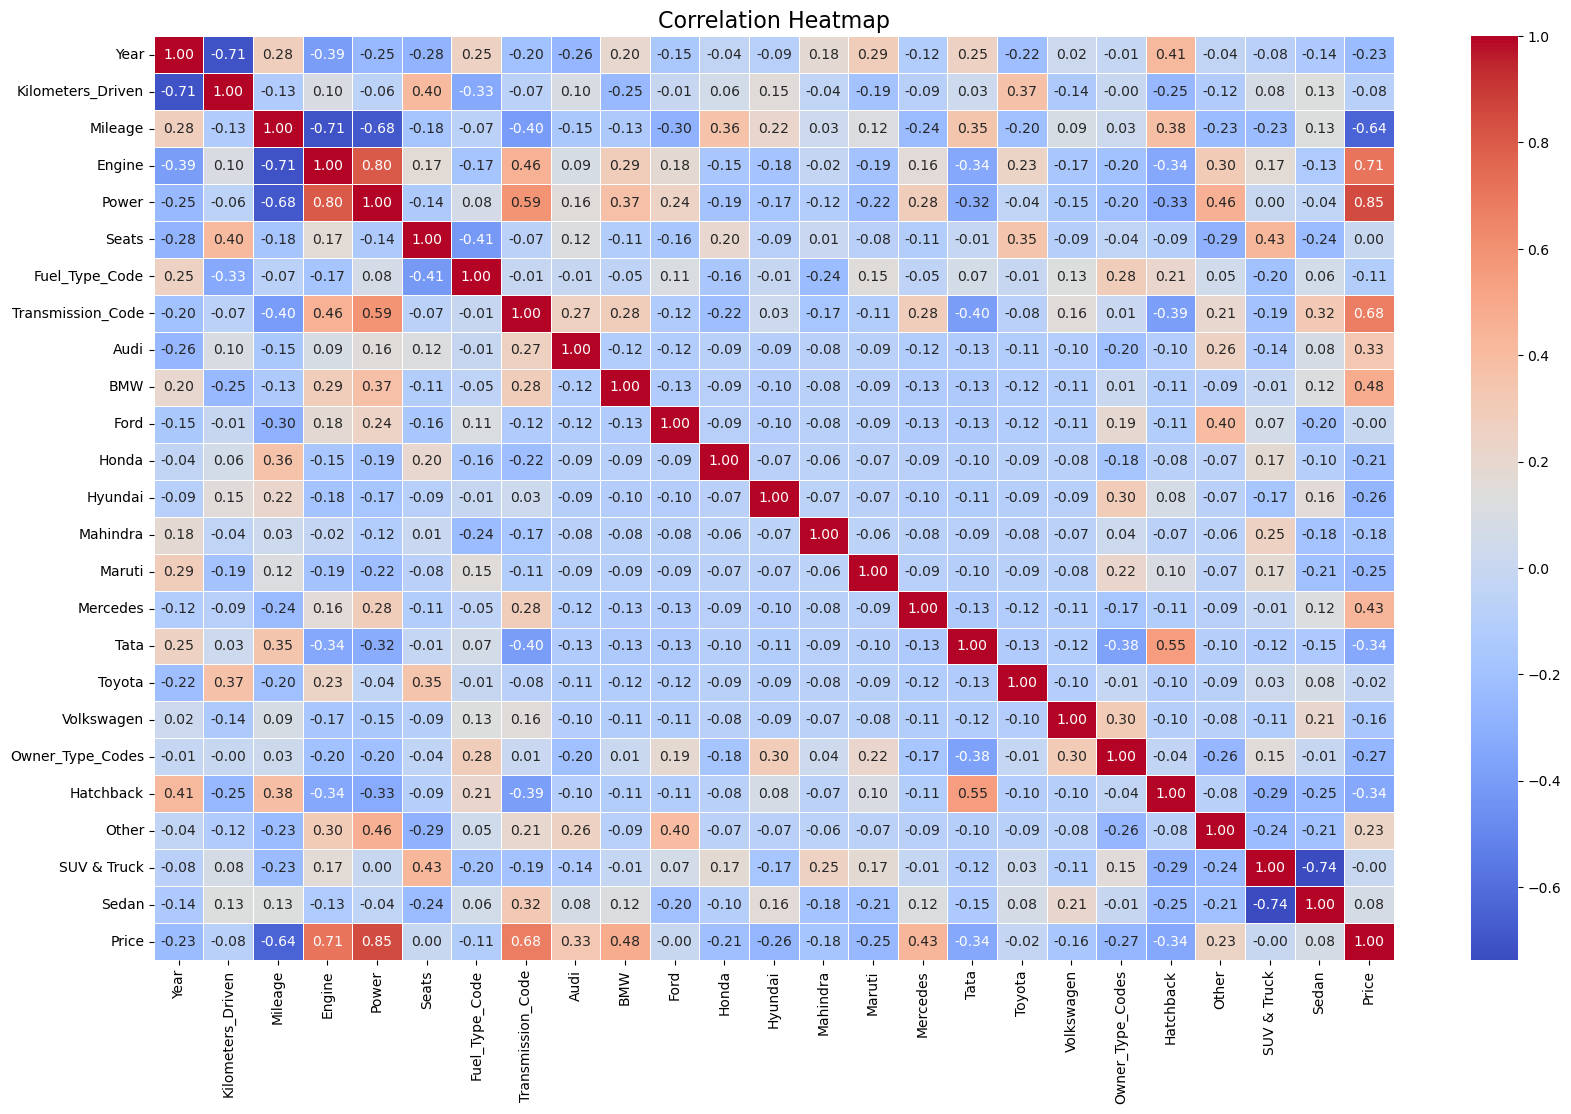

In [17]:
# Create a Correlation Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)

plt.show()

In [18]:
# Filter correlations with target variable above 0.5 in absolute value
target_correlations = correlation_matrix['Price'].abs().sort_values(ascending=False)
high_correlation_features = target_correlations[target_correlations > 0.5].index

# Display features with high correlation
print("Features with |correlation| > 0.5:")
print(target_correlations[high_correlation_features])

Features with |correlation| > 0.5:
Price                1.000000
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage              0.638404
Name: Price, dtype: float64


**Висновок:**
Найбільшу кореляцію (|> 0.5|) із цільовою змінною `Price` мають наступні ознаки:
- `Power`: 0.85 (сильна позитивна кореляція).
- `Engine`: 0.71 (сильна позитивна кореляція).
- `Transmission_Code`: 0.68 (сильна позитивна кореляція).
- `Mileage`: -0.64 (сильна негативна кореляція).

Ці ознаки можуть мати найбільший вплив на зміну ціни автомобіля та є ключовими для аналізу.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [19]:
# Filter numeric columns and drop 'Car_ID'
X_train = X_train.select_dtypes(include=['number']).drop(columns=['Car_ID'], axis=1)
X_test = X_test.select_dtypes(include=['number']).drop(columns=['Car_ID'], axis=1)

# Confirm the shapes of the resulting data
display(X_train.head())
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Hatchback,Other,SUV & Truck,Sedan
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


X_train shape: (80, 24)
X_test shape: (20, 24)


In [20]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Display RMSE results
print(f"RMSE on training set: {rmse_train:.2f}")
print(f"RMSE on test set: {rmse_test:.2f}")


RMSE on training set: 197257.59
RMSE on test set: 345821.68


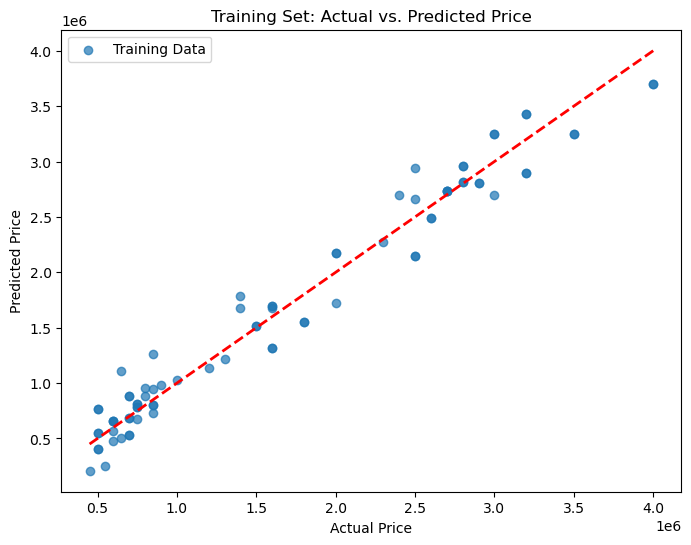

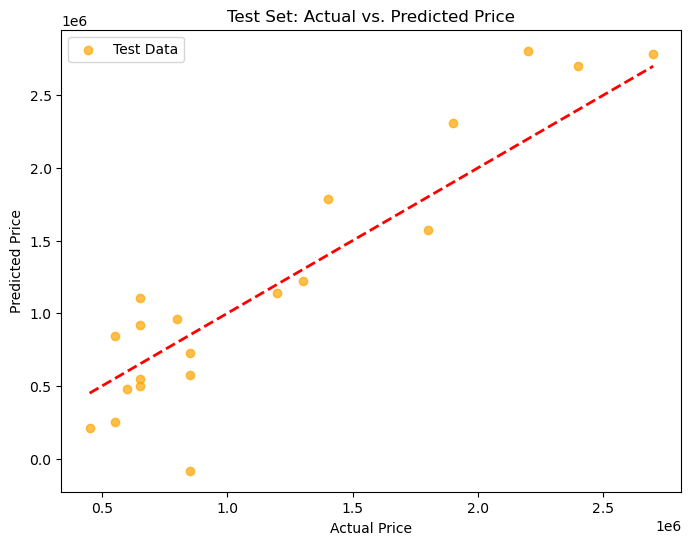

In [22]:
# Training set scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Set: Actual vs. Predicted Price')
plt.legend()
plt.show()

# Test set scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Set: Actual vs. Predicted Price')
plt.legend()
plt.show()


**Висновок:** Модель працює добре на тренувальних даних, але її узагальнення на тестових даних слабке.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [23]:
numerical_columns = [col for col in numerical_columns if col not in ['Car_ID', 'Price']]

numerical_columns, len(numerical_columns)

(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats'], 6)

In [24]:
# Dynamically update binary column names to include "_Code"
binary_columns_with_code = [f"{col}_Code" for col in binary_columns]

# Concatenate all encoded column lists
encoded_categorical_columns = (
    binary_columns_with_code
    + brand_encoded_columns.tolist()
    + body_type_encoded_columns.tolist()
    + ['Owner_Type_Codes']
)

encoded_categorical_columns, len(encoded_categorical_columns)

(['Fuel_Type_Code',
  'Transmission_Code',
  'Audi',
  'BMW',
  'Ford',
  'Honda',
  'Hyundai',
  'Mahindra',
  'Maruti',
  'Mercedes',
  'Tata',
  'Toyota',
  'Volkswagen',
  'Hatchback',
  'Other',
  'SUV & Truck',
  'Sedan',
  'Owner_Type_Codes'],
 18)

In [25]:
scaler = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])


In [26]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Verify that scaling was applied correctly (mean ~0, std ~1 for training data)
print("Mean of scaled X_train:\n", X_train_scaled.mean(axis=0))
print("Std of scaled X_train:\n", X_train_scaled.std(axis=0))


Shape of X_train_scaled: (80, 6)
Shape of X_test_scaled: (20, 6)
Mean of scaled X_train:
 Year                 4.060086e-14
Kilometers_Driven    2.775558e-18
Mileage              1.110223e-17
Engine               6.661338e-17
Power                1.776357e-16
Seats                4.662937e-16
dtype: float64
Std of scaled X_train:
 Year                 1.006309
Kilometers_Driven    1.006309
Mileage              1.006309
Engine               1.006309
Power                1.006309
Seats                1.006309
dtype: float64


In [27]:
# Combine scaled and encoded features
X_train_scaled_encoded = pd.concat([X_train_scaled, X_train[encoded_categorical_columns]], axis=1)
X_test_scaled_encoded = pd.concat([X_test_scaled, X_test[encoded_categorical_columns]], axis=1)

# Train the linear regression model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled_encoded, y_train)

# Combine numeric and categorical feature names
all_features = numerical_columns + encoded_categorical_columns

weights_df = pd.DataFrame({
    'feature': np.append(all_features, 'intercept'),  
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)  
})

weights_df.sort_values(by='weight', ascending=False)


,feature,weight
24,intercept,1.564204e+06
8,Audi,8.206995e+05
9,BMW,6.512737e+05
15,Mercedes,6.471918e+05
4,Power,5.516283e+05
7,Transmission_Code,3.033069e+05
19,Hatchback,2.099146e+05
17,Toyota,1.928177e+05
21,SUV & Truck,1.219994e+05
22,Sedan,2.173181e+04


**Висновок:**

1. Позитивний вплив:
    - Преміум бренди (`Audi`, `BMW`, `Mercedes`) мають найбільший вплив на підвищення ціни, що логічно, враховуючи їх престиж.
    - Потужність двигуна (`Power`) та автоматична трансмісія (`Transmission_Code` = 1) значно впливають на підвищення ціни, оскільки більша потужність асоціюється з продуктивністю, а автоматична трансмісія забезпечує комфорт у використанні.
    - Новіші автомобілі (`Year`) також збільшують вартість, що є логічним.

2. Негативний вплив:
    - Велика кількість попередніх власників (`Owner_Type_Codes`) знижує ціну через меншу довіру до таких авто.
    - Масові бренди (`Hyundai`, `Maruti`) мають менший вплив на вартість через орієнтацію на бюджетний сегмент.
    - Негативний вплив `Engine` та `Mileage` на ціну може здаватися нелогічним, але це може пояснюватися високими витратами пального, податками, низьким попитом у бюджетному сегменті або мультиколінеарністю з `Power`.

Напрям впливу ключових змінних є логічним і відповідає ринковим реаліям. Однак, для змінних `Engine` та `Mileage` потрібен додатковий аналіз, щоб уточнити їх зв’язок із ціною.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [28]:
# Add an intercept to the training data for statsmodels
X_train_with_const = sm.add_constant(X_train_scaled_encoded)

# Fit the model with statsmodels
model_sm = sm.OLS(y_train, X_train_with_const).fit()

model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     68.58
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           3.77e-33
Time:                        12:41:21   Log-Likelihood:                -1088.9
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      57   BIC:                             2279.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.167e+06   6.05e+04     19.288      0.000    1.05e+06    1.29e+06
Year                504.6904   5.75e+04      0.009      0.993   -1.15e+05    1.16e+05
Kilometers_Driven -8.788e+04   5.63e+04     -1.561      0.124   -2.01e+05    2.48e+04
Mileage           -1.218e+05   5.83e+04     -2.088      0.041   -2.39e+05   -4966.247
Engine            -4.606e+04   6.81e+04     -0.677      0.501   -1.82e+05    9.03e+04
Power              5.516e+05   7.55e+04      7.302      0.000       4e+05    7.03e+05
Seats             -4.654e+04   4.38e+04     -1.064      0.292   -1.34e+05    4.11e+04
Fuel_Type_Code     -4.04e+05   8.92e+04     -4.531      0.000   -5.83e+05   -2.25e+05
Transmission_Code  3.033e+05   9.15e+04      3.314      0.002     1.2e+05    4.87e+05
Audi               9.267e+05   1.04e+05      8.903      0.000    7.18e+05    1.14e+06
BMW                7.573e+05   1.14e+05      6.646      0.000    5.29e+05    9.86e+05
Ford              -8.224e+04    1.1e+05     -0.745      0.459   -3.03e+05    1.39e+05
Honda             -9.279e+04   1.37e+05     -0.675      0.502   -3.68e+05    1.82e+05
Hyundai           -3.741e+05   1.06e+05     -3.544      0.001   -5.86e+05   -1.63e+05
Mahindra          -5.005e+05   1.29e+05     -3.867      0.000    -7.6e+05   -2.41e+05
Maruti            -3.022e+05   1.16e+05     -2.605      0.012   -5.35e+05   -6.99e+04
Mercedes           7.532e+05   1.07e+05      7.058      0.000     5.4e+05    9.67e+05
Tata              -1.086e+05   1.28e+05     -0.848      0.400   -3.65e+05    1.48e+05
Toyota             2.989e+05   1.08e+05      2.762      0.008    8.22e+04    5.16e+05
Volkswagen        -1.092e+05   1.06e+05     -1.034      0.306   -3.21e+05    1.02e+05
Hatchback          5.015e+05   1.17e+05      4.301      0.000    2.68e+05    7.35e+05
Other             -6.201e+04   1.38e+05     -0.450      0.654   -3.38e+05    2.14e+05
SUV & Truck        4.136e+05   6.25e+04      6.620      0.000    2.89e+05    5.39e+05
Sedan              3.134e+05   6.74e+04      4.650      0.000    1.78e+05    4.48e+05
Owner_Type_Codes   -486.7137   7.48e+04     -0.007      0.995    -1.5e+05    1.49e+05
==============================================================================
Omnibus:                        1.069   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                1.029
Skew:                          -0.115   Prob(JB):                        0.598
Kurtosis:                       2.494   Cond. No.                     2.74e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-31. This might indicate that there are
strong multicollinearity 

In [29]:
# Extract significant features based on p-value < 0.05
significant_features_005 = model_sm.pvalues[model_sm.pvalues < 0.05].index
print("\nStatistically significant features (p-value < 0.05):")
print(significant_features_005)


Statistically significant features (p-value < 0.05):
Index(['const', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
       'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota',
       'Hatchback', 'SUV & Truck', 'Sedan'],
      dtype='object')


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [30]:
# Remove 'const' from the list of significant features
significant_features_005 = [feature for feature in significant_features_005 if feature != 'const']
X_train_significant_005 = X_train_scaled_encoded[significant_features_005]

X_train_significant_const_005 = sm.add_constant(X_train_significant_005)

# Fit the model using significant features with statsmodels
model_sm_significant_005 = sm.OLS(y_train, X_train_significant_const_005).fit()

model_sm_significant_005.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     107.1
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.99e-39
Time:                        12:41:21   Log-Likelihood:                -1094.2
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      65   BIC:                             2254.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.101e+06    1.4e+05      7.890      0.000    8.22e+05    1.38e+06
Mileage           -8.732e+04   4.18e+04     -2.088      0.041   -1.71e+05   -3780.963
Power              5.041e+05   5.46e+04      9.235      0.000    3.95e+05    6.13e+05
Fuel_Type_Code    -2.765e+05   5.88e+04     -4.704      0.000   -3.94e+05   -1.59e+05
Transmission_Code  3.125e+05   7.97e+04      3.920      0.000    1.53e+05    4.72e+05
Audi               9.857e+05   1.03e+05      9.560      0.000     7.8e+05    1.19e+06
BMW                9.909e+05   1.15e+05      8.605      0.000    7.61e+05    1.22e+06
Hyundai           -3.127e+05   1.09e+05     -2.865      0.006   -5.31e+05   -9.47e+04
Mahindra          -3.041e+05   1.31e+05     -2.319      0.024   -5.66e+05   -4.22e+04
Maruti            -1.491e+05    1.2e+05     -1.247      0.217   -3.88e+05    8.98e+04
Mercedes            9.62e+05    1.1e+05      8.776      0.000    7.43e+05    1.18e+06
Toyota             2.665e+05   1.01e+05      2.635      0.011    6.45e+04    4.68e+05
Hatchback          3.935e+05   1.87e+05      2.105      0.039    2.03e+04    7.67e+05
SUV & Truck        2.705e+05   1.46e+05      1.858      0.068   -2.03e+04    5.61e+05
Sedan              1.878e+05   1.54e+05      1.222      0.226   -1.19e+05    4.95e+05
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.509
Skew:                          -0.147   Prob(JB):                        0.775
Kurtosis:                       2.742   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Аналіз змін *R-squared* та *Adj. R-squared*:**

Повна модель (усі змінні):
    - *R-squared*: 0.964
    - *Adj. R-squared*: 0.950
    - Модель пояснює 96.4% варіації цільової змінної (`Price`). Скоригований показник (95.0%) підтверджує, що додаткові змінні трохи підвищують точність.

Модель із значущими змінними:
    - *R-squared*: 0.958
    - *Adj. R-squared*: 0.949
    - Модель на основі лише значущих змінних майже не втрачає пояснювальну здатність, скоротившись лише на 0.6% для *R-squared* та 0.1% для *Adj. R-squared*.

**Висновок:**
- Скорочення ознак до статистично значущих майже не вплинуло на якість моделі.
- Модель зі значущими змінними більш спрощена, але зберігає високу прогностичну здатність, що робить її оптимізованою для інтерпретації та практичного застосування.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [31]:
# Extract features with p-value < 0.25
significant_features_025 = model_sm.pvalues[model_sm.pvalues < 0.25].index

# Remove 'const' from the list of features
significant_features_025 = [feature for feature in significant_features_025 if feature != 'const']

print("\nStatistically significant features (p-value < 0.25):")
print(significant_features_025)


Statistically significant features (p-value < 0.25):
['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota', 'Hatchback', 'SUV & Truck', 'Sedan']


In [32]:
X_train_significant_025 = X_train_scaled_encoded[significant_features_025]

X_train_significant_const_025 = sm.add_constant(X_train_significant_025)

# Fit the model using the features with p-value < 0.25
model_sm_significant_025 = sm.OLS(y_train, X_train_significant_const_025).fit()

model_sm_significant_025.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.41e-39
Time:                        12:41:21   Log-Likelihood:                -1090.3
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      64   BIC:                             2251.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.074e+06   1.34e+05      7.991      0.000    8.05e+05    1.34e+06
Kilometers_Driven  -8.89e+04   3.46e+04     -2.566      0.013   -1.58e+05   -1.97e+04
Mileage           -1.009e+05   4.05e+04     -2.492      0.015   -1.82e+05      -2e+04
Power              5.259e+05   5.31e+04      9.910      0.000     4.2e+05    6.32e+05
Fuel_Type_Code    -3.434e+05   6.21e+04     -5.527      0.000   -4.68e+05   -2.19e+05
Transmission_Code   2.79e+05   7.76e+04      3.595      0.001    1.24e+05    4.34e+05
Audi               1.005e+06   9.92e+04     10.129      0.000    8.07e+05     1.2e+06
BMW                8.825e+05   1.18e+05      7.459      0.000    6.46e+05    1.12e+06
Hyundai            -2.62e+05   1.07e+05     -2.459      0.017   -4.75e+05   -4.91e+04
Mahindra          -3.675e+05   1.28e+05     -2.865      0.006   -6.24e+05   -1.11e+05
Maruti            -1.826e+05   1.16e+05     -1.581      0.119   -4.13e+05    4.82e+04
Mercedes            8.94e+05   1.08e+05      8.241      0.000    6.77e+05    1.11e+06
Toyota             3.286e+05      1e+05      3.286      0.002    1.29e+05    5.28e+05
Hatchback          4.432e+05    1.8e+05      2.456      0.017    8.28e+04    8.04e+05
SUV & Truck        3.671e+05   1.45e+05      2.537      0.014     7.8e+04    6.56e+05
Sedan              3.077e+05   1.55e+05      1.989      0.051   -1365.596    6.17e+05
==============================================================================
Omnibus:                        1.762   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.426
Skew:                          -0.147   Prob(JB):                        0.490
Kurtosis:                       2.416   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Аналіз показників моделі:**

*R-squared* та *Adj. R-squared*:
- У моделі з усіма ознаками: *R-squared*=0.964, *Adj. R-squared*=0.950.
- У моделі з ознаками, де *p-value* < 0.25: *R-squared*=0.962, *Adj. R-squared*=0.953.

**Висновок:** 
Значення *R-squared* та *Adj. R-squared* майже не змінилися в усіх трьох випадках, що свідчить про незначний вплив менш значущих ознак на якість моделі.

**Рекомендована модель:**
Я б обрала модель з ознаками, де *p-value* < 0.25, оскільки:
- Вона спрощує інтерпретацію, залишаючи лише більш релевантні ознаки.
- Показники *R-squared* та *Adj.R-squared* залишаються високими.
- Вона є оптимальною за кількістю параметрів та стабільністю моделі.